In [0]:
#importing all necessary packages
import keras
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rn
from keras.models import Sequential
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization,Dense,Dropout
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm


Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#creating path variable to the dataset
path=os.path.join('gdrive','My Drive','Colab Notebooks', 'flowers-recognition', 'flowers')
path

'gdrive/My Drive/Colab Notebooks/flowers-recognition/flowers'

In [0]:
#setting path to different flower folders in the dataset
daisy_path=path+'/daisy'
dandelion_path=path+'/dandelion'
rose_path=path+'/rose'
sunflower_path=path+'/sunflower'
tulip_path=path+'/tulip'

In [0]:
#function to perform labelling of the images
def assign_label(img,flower_type):
    return flower_type

In [0]:
x = []
y = []
img_size = 150


In [0]:
#function to label the images and push them to the training set
def make_training_set(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,flower_type)
        path=os.path.join(DIR,img)
        img=cv2.imread(path,cv2.IMREAD_COLOR)
        img=cv2.resize(img,(img_size,img_size))
        
        x.append(np.array(img))
        y.append(str(label))

In [0]:
#the following 4 lines will perform the above operation to 4 different types of flowers stored in 4 folders
make_training_set('Daisy', daisy_path)

100%|██████████| 769/769 [08:45<00:00,  1.69it/s]


In [0]:
make_training_set('Rose',rose_path)


100%|██████████| 784/784 [09:12<00:00,  1.36it/s]


In [0]:
make_training_set('Sunflower',sunflower_path)

100%|██████████| 734/734 [09:09<00:00,  1.53it/s]


In [0]:
make_training_set('Tulip',tulip_path)

100%|██████████| 997/997 [11:54<00:00,  1.21it/s]


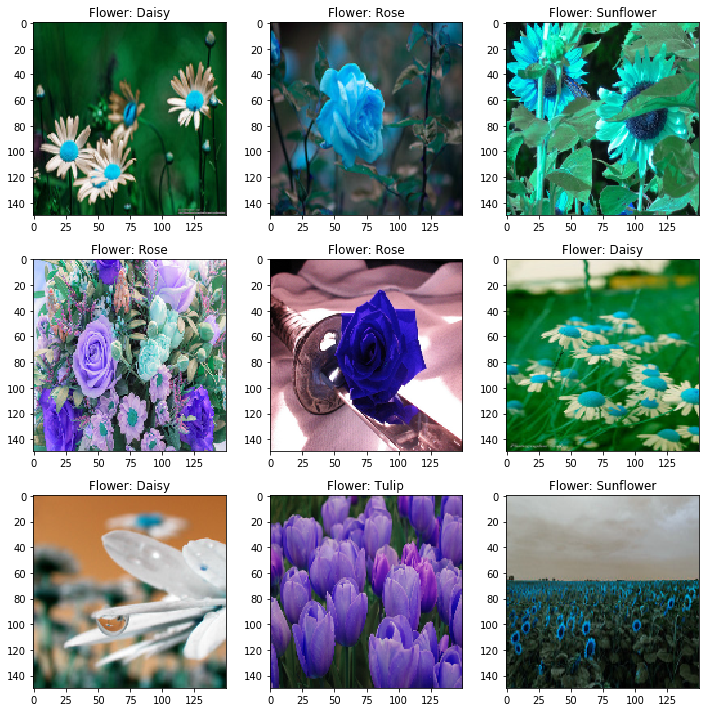

In [0]:
#checking the dataset by printing 9 random images
fig,ax=plt.subplots(3,3)
fig.set_size_inches(10,10)
for i in range(3):
    for j in range (3):
        l=rn.randint(0,len(y))
        ax[i,j].imshow(x[l])
        ax[i,j].set_title('Flower: '+y[l])
        
plt.tight_layout()

In [0]:
#checking length of the dataset
len(x)

3284

In [0]:
#encoding images in the dataset according to thier labels
le = LabelEncoder()
y=le.fit_transform(y)
Y=to_categorical(y,4)
X=np.array(x)
#X=X.astype('float32')
X=X/25

In [0]:
#splitting dataset into training and testing set
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [0]:
#checking shape of training datatset. Here, there are 2463 images of size 150x150x3 
x_train.shape

(2463, 150, 150, 3)

In [0]:
#importing packages to set seeds
import random as rn
import tensorflow as tf

In [0]:
#setting seeds to the random generator to keep the change constant
np.random.seed(45)
rn.seed(45)
tf.set_random_seed(45)

In [0]:
# **** BUILDING THE MODEL ****
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(4, activation = "softmax"))

In [0]:
batch_size=128
epochs=50

#setting callback to reduce LR when the model metrics stops improving
from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [0]:
#creating image data batches to iterate over
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [0]:
#from keras.optimizers import Adam

In [0]:
#compiling the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 37, 37, 96)        55392     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 18, 18, 96)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 18, 18, 96)        83040     
__________

In [0]:
#model fiting to train the dataset and validate them using training and testing datasets
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/50
19/19 [==============================] - 12s 621ms/step - loss: 2.2267 - acc: 0.3503 - val_loss: 1.0992 - val_acc: 0.5079
Epoch 2/50
19/19 [==============================] - 10s 547ms/step - loss: 1.1132 - acc: 0.4947 - val_loss: 0.8811 - val_acc: 0.6224
Epoch 3/50
19/19 [==============================] - 10s 541ms/step - loss: 0.9448 - acc: 0.5865 - val_loss: 0.8565 - val_acc: 0.6468
Epoch 4/50
19/19 [==============================] - 10s 533ms/step - loss: 0.9066 - acc: 0.6187 - val_loss: 0.8470 - val_acc: 0.6443
Epoch 5/50
19/19 [==============================] - 10s 530ms/step - loss: 0.8572 - acc: 0.6305 - val_loss: 0.8630 - val_acc: 0.6346
Epoch 6/50
19/19 [==============================] - 10s 544ms/step - loss: 0.8411 - acc: 0.6491 - val_loss: 0.8795 - val_acc: 0.6358
Epoch 7/50
19/19 [==============================] - 10s 541ms/step - loss: 0.8136 - acc: 0.6619 - val_loss: 0.7841 - val_acc: 0.6943
Epoch 8/50
19/19 [==============================] - 10s 536ms/step - 

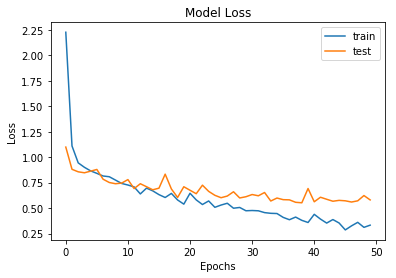

In [0]:
#plooting epochs vs loss graph
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

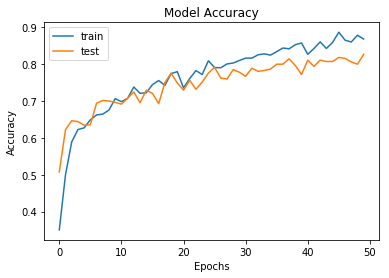

In [0]:
#plotting epochs vs accuracy graph
plt.plot(History.history['acc'])
plt.plot(History.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [0]:
model.evaluate(x_test, y_test)

821/821 [==============================] - 1s 697us/step


[0.5804548038489635, 0.8270401952472878]